In [1]:
import os
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, f1_score, recall_score, precision_score, auc, precision_recall_curve, roc_curve, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from torch.utils.data import DataLoader, Subset
from torchvision import transforms, models
import torch
from torch import nn, optim
from torchvision.io import read_image

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define hyperparameters grid

epochs_options = [5,8]
learning_rates = [0.001,0.002]
freeze_layers_options = [5,3]
optimizers = [(optim.Adam, {'lr': lr}) for lr in learning_rates]
batch_sizes = [16,32]
early_stopping_patience = 3


# Define transformations for images already in tensor format
data_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize only
])

class MelanomaDataset(torch.utils.data.Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.annotations = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0] + '.jpg')
        image = read_image(img_path).float()  # Image is read as a Tensor

        # Assuming 'target' is the correct column name for the labels
        y_label = torch.tensor(int(self.annotations.iloc[index]['target']))

        if self.transform:
            image = self.transform(image)  # Apply resizing and normalization

        return (image, y_label)



In [2]:
# Load the CSV file
data = pd.read_csv("train.csv")

# Separate images with target 0 and 1
target_0 = data[data['target'] == 0]
target_1 = data[data['target'] == 1]

# Randomly select 4416 images with target 0
selected_target_0 = target_0.sample(n=1000, random_state=42)

# Concatenate with 584 images with target 1
selected_data = pd.concat([selected_target_0, target_1])

# Shuffle the concatenated DataFrame
selected_data = selected_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Load data and prepare dataset
train_data = MelanomaDataset(dataframe=selected_data, root_dir="train/", transform=data_transforms)

# All combinations
hyperparams = list(itertools.product(epochs_options, optimizers, freeze_layers_options, batch_sizes))

Training fold 1 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 16
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

Early stopping at epoch 4


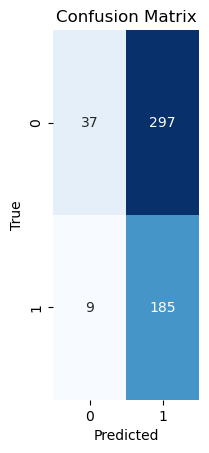

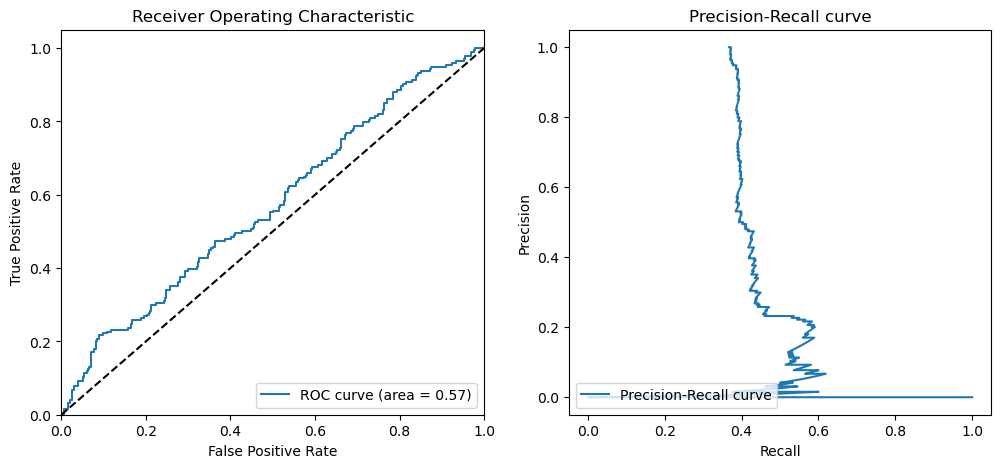

Training fold 2 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 16
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

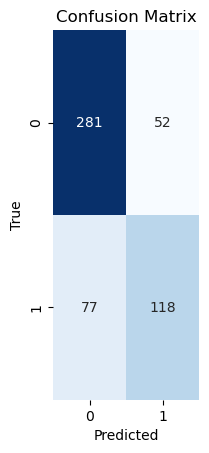

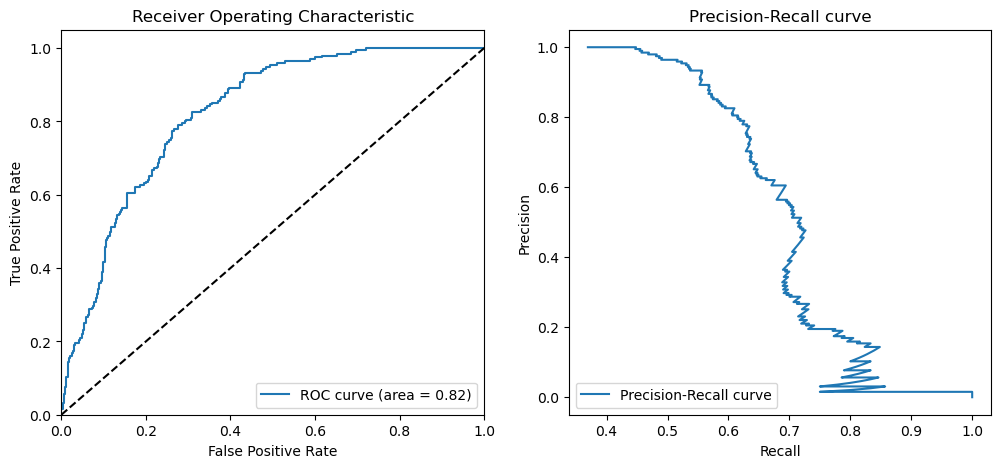

Training fold 3 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 16
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

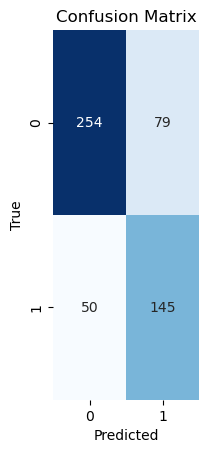

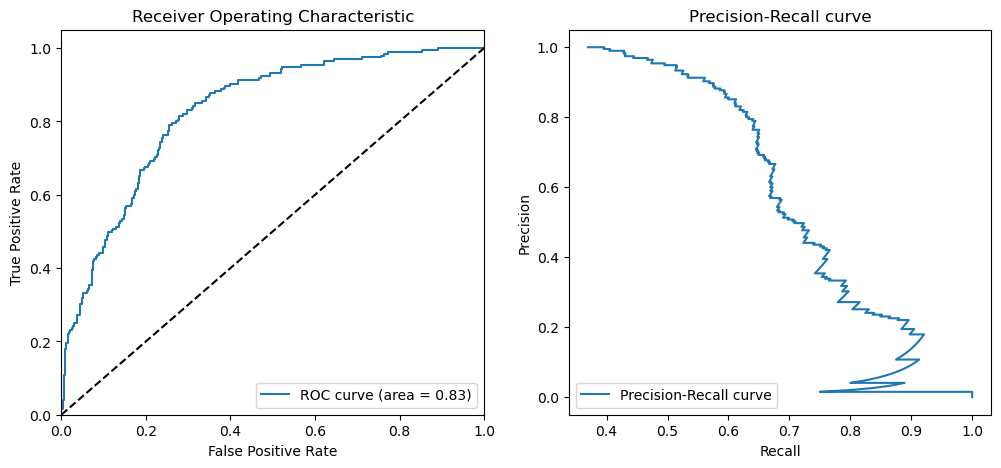

Training fold 1 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 32
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

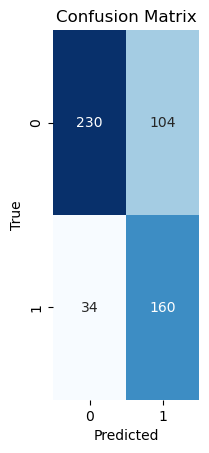

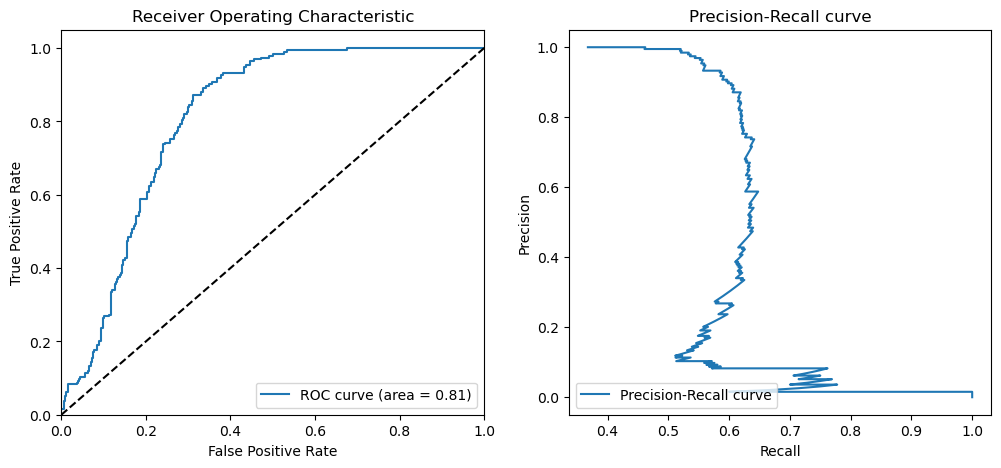

Training fold 2 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 32
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

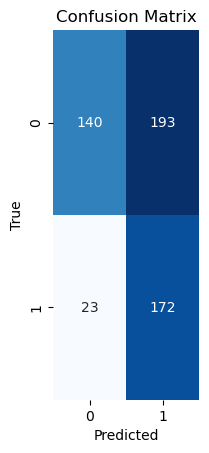

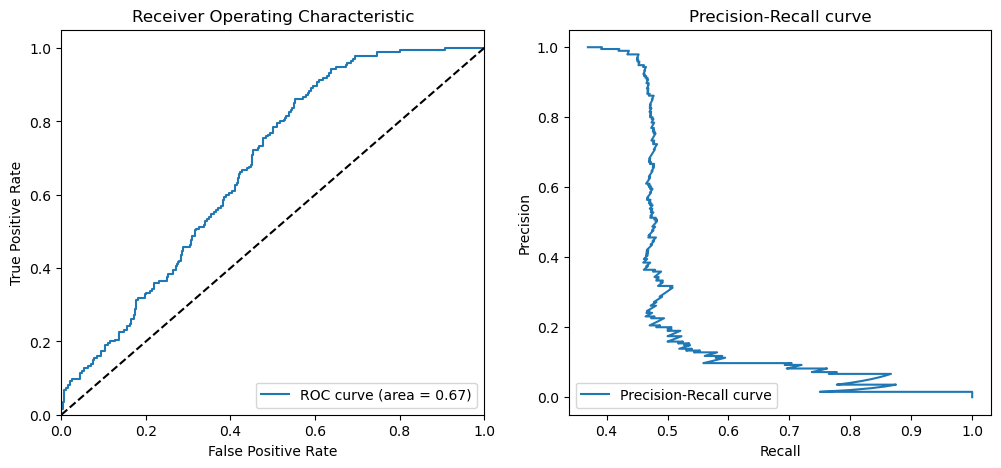

Training fold 3 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 5 layers, batch size 32
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

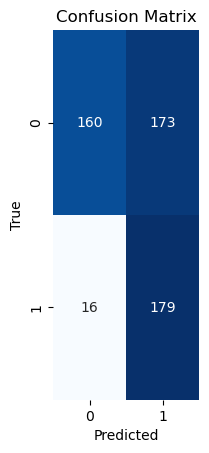

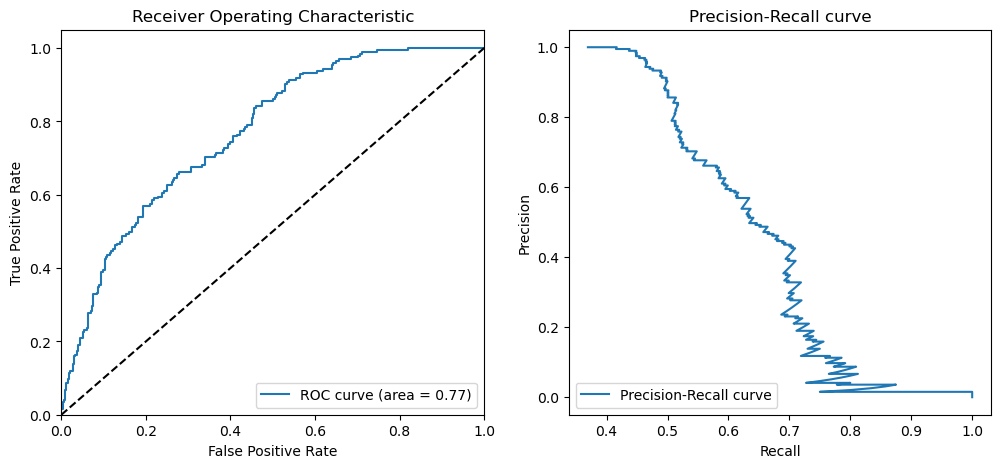

Training fold 1 for 5 epochs, optimizer Adam, learning rate 0.001, freeze 3 layers, batch size 16
hi


/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Users/girijashankar/anaconda3/lib/python3.11/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends.

In [ ]:
# Stratified K-Fold and hyperparameter tuning
skf = StratifiedKFold(n_splits=3)
results = {}

for epochs, (optimizer_class, opt_params), freeze_layers, batch_size in hyperparams:
    for fold, (train_idx, val_idx) in enumerate(skf.split(train_data.annotations, train_data.annotations['target'])):
        print(f"Training fold {fold+1} for {epochs} epochs, optimizer {optimizer_class.__name__}, learning rate {opt_params['lr']}, freeze {freeze_layers} layers, batch size {batch_size}")

        # Data loaders
        train_subsampler = Subset(train_data, train_idx)
        val_subsampler = Subset(train_data, val_idx)
        train_loader = DataLoader(train_subsampler, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_subsampler, batch_size=batch_size, shuffle=False)
        print("hi")
        # Initialize model
        # Initialize model
        model = models.densenet121(pretrained=True)
        # Freeze layers
        children = list(model.children())
        for child in children[:-freeze_layers]:
            for param in child.parameters():
                param.requires_grad = False

        # Replace the classifier layer (assuming the number of output classes is 2)
        model.classifier = nn.Linear(model.classifier.in_features, 2)
        model.to(device)

        # Optimizer and loss
        optimizer = optimizer_class(model.parameters(), **opt_params)
        criterion = nn.CrossEntropyLoss()

        # Early stopping variables
        best_val_loss = float('inf')
        patience_counter = 0
        # Training loop with early stopping
        for epoch in range(epochs):
            model.train()
            for inputs, labels in train_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            # Validation
            val_loss = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs = inputs.to(device)
                    labels = labels.to(device)
                    outputs = model(inputs)
                    val_loss += criterion(outputs, labels).item()
            
            # Early stopping check
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1
                if patience_counter >= early_stopping_patience:
                    print(f"Early stopping at epoch {epoch+1}")
                    break

        # Metrics calculation
        y_true, y_pred, y_scores = [], [], []
        model.eval()
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                y_pred.extend(predicted.cpu().numpy())
                y_true.extend(labels.cpu().numpy())
                y_scores.extend(outputs[:, 1].cpu().numpy())
       
        # Confusion matrix and scores
        cm = confusion_matrix(y_true, y_pred)
        # Confusion Matrix
        plt.subplot(1, 3, 3)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title('Confusion Matrix')

        plt.show()
        f1 = f1_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, y_scores)
        accuracy = np.mean(np.array(y_true) == np.array(y_pred))
        precision_recall_display = precision_recall_curve(y_true, y_scores)
        roc_display = roc_curve(y_true, y_scores)
        print()
        # Plotting ROC and Precision-Recall curves
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(roc_display[0], roc_display[1], label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        print()
        plt.subplot(1, 2, 2)
        plt.plot(precision_recall_display[0], precision_recall_display[1], label='Precision-Recall curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall curve')
        plt.legend(loc="lower left")
        plt.show()

        # Save or log results
        results[f'Fold={fold}_Epochs={epochs}_LR={opt_params["lr"]}_Freeze={freeze_layers}_Batch={batch_size}'] = {
            'confusion_matrix': cm,
            'f1_score': f1,
            'recall': recall,
            'precision': precision,
            'roc_auc': roc_auc,
            'accuracy': accuracy
        }


The keyboard error in the end is because we terminated the code from running as we tried adequate number of hyperparametere configurations